<a href="https://colab.research.google.com/github/cdhakami-p/CSCI-B455/blob/main/hw1/q2/hw1_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1 Question 1**

In [3]:
# Import initial libraries and dataset

import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split

df = pd.read_csv("cbb.csv")

# Preprocess dataset

df = df.drop(columns=['G','W', 'TEAM', 'CONF', '2P_O', '2P_D', 'WAB', 'SEED', 'YEAR'])

postseason_map = {'R64': 0,'R32': 1,'S16': 2,'E8': 3,'F4': 4,'2ND': 5,'Champions': 6}
df["POSTSEASON"] = df["POSTSEASON"].map(postseason_map)
df = df.dropna(subset=['POSTSEASON'])

train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# Preview training data

train_data.head()

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,3P_O,3P_D,ADJ_T,POSTSEASON
0,112.8,95.7,0.8693,51.1,45.0,15.9,14.9,32.5,28.2,46.7,31.3,33.2,34.8,66.2,0.0
1,110.2,93.0,0.8748,53.1,47.1,17.9,18.4,30.0,24.0,28.5,33.0,34.3,28.9,69.0,0.0
2,104.6,87.6,0.8838,50.1,43.5,20.0,23.4,31.0,30.6,35.7,36.6,30.5,28.5,69.7,0.0
3,111.7,90.9,0.9146,50.5,47.2,18.9,20.3,32.8,27.0,35.8,35.7,33.2,33.5,70.0,2.0
4,112.2,94.2,0.8818,52.7,49.6,19.1,22.1,29.5,32.3,41.1,33.4,36.2,38.2,67.2,0.0


# **PART A:**

Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?


In [4]:
print("Number of (instances, attributes):", train_data.shape)

# Type of each attribute & non-null counts
print("\nType of data for each attribute & non-null counts: ")
print(train_data.info(memory_usage=False, ))

# Null counts
null_counts = train_data.isnull().sum()
print("\nNull values per attribute: \n")
print(null_counts.to_string() + "\n")

print("\nAll attribute data types are continuous floats.")
print("There are no instances with missing values for any attribute")


Number of (instances, attributes): (528, 15)

Type of data for each attribute & non-null counts: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ADJOE       528 non-null    float64
 1   ADJDE       528 non-null    float64
 2   BARTHAG     528 non-null    float64
 3   EFG_O       528 non-null    float64
 4   EFG_D       528 non-null    float64
 5   TOR         528 non-null    float64
 6   TORD        528 non-null    float64
 7   ORB         528 non-null    float64
 8   DRB         528 non-null    float64
 9   FTR         528 non-null    float64
 10  FTRD        528 non-null    float64
 11  3P_O        528 non-null    float64
 12  3P_D        528 non-null    float64
 13  ADJ_T       528 non-null    float64
 14  POSTSEASON  528 non-null    float64
dtypes: float64(15)None

Null values per attribute: 

ADJOE         0
ADJDE         0
BARTHAG       

**Part A Summary:**

All attribute data types are continuous floats.

There are no instances with null Life Ladder attributes, but each other attribute is missing in 10-86 instances as listed above.

# **PART B:**

Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute.

Explain noticeable traits for key attributes. Are there any attributes that might require special treatment?

If so, what special treatment might they require?

In [5]:
# Statistical summary
print("Statistical summary of the training data: ")
display(train_data.describe().T)


Statistical summary of the training data: 


,count,mean,std,min,25%,50%,75%,max
ADJOE,528.0,111.663258,6.321805,90.6000,107.6000,111.90000,115.62500,129.1000
ADJDE,528.0,96.699432,5.107258,84.3000,93.1000,96.40000,100.22500,114.7000
BARTHAG,528.0,0.800854,0.158059,0.2398,0.7446,0.85605,0.90985,0.9791
EFG_O,528.0,52.214394,2.769956,44.6000,50.4000,52.10000,54.02500,61.0000
EFG_D,528.0,47.885985,2.310473,41.1000,46.3000,48.00000,49.40000,55.7000
TOR,528.0,17.317235,1.936807,12.4000,16.1000,17.20000,18.50000,23.1000
TORD,528.0,18.917992,2.520790,11.2000,17.1000,18.80000,20.30000,28.5000
ORB,528.0,31.402273,4.200189,17.7000,28.8000,31.45000,34.20000,42.0000
DRB,528.0,28.333902,2.947048,18.7000,26.2000,28.45000,30.40000,37.3000
FTR,528.0,35.362311,5.492344,21.3000,31.5000,35.10000,39.05000,53.9000


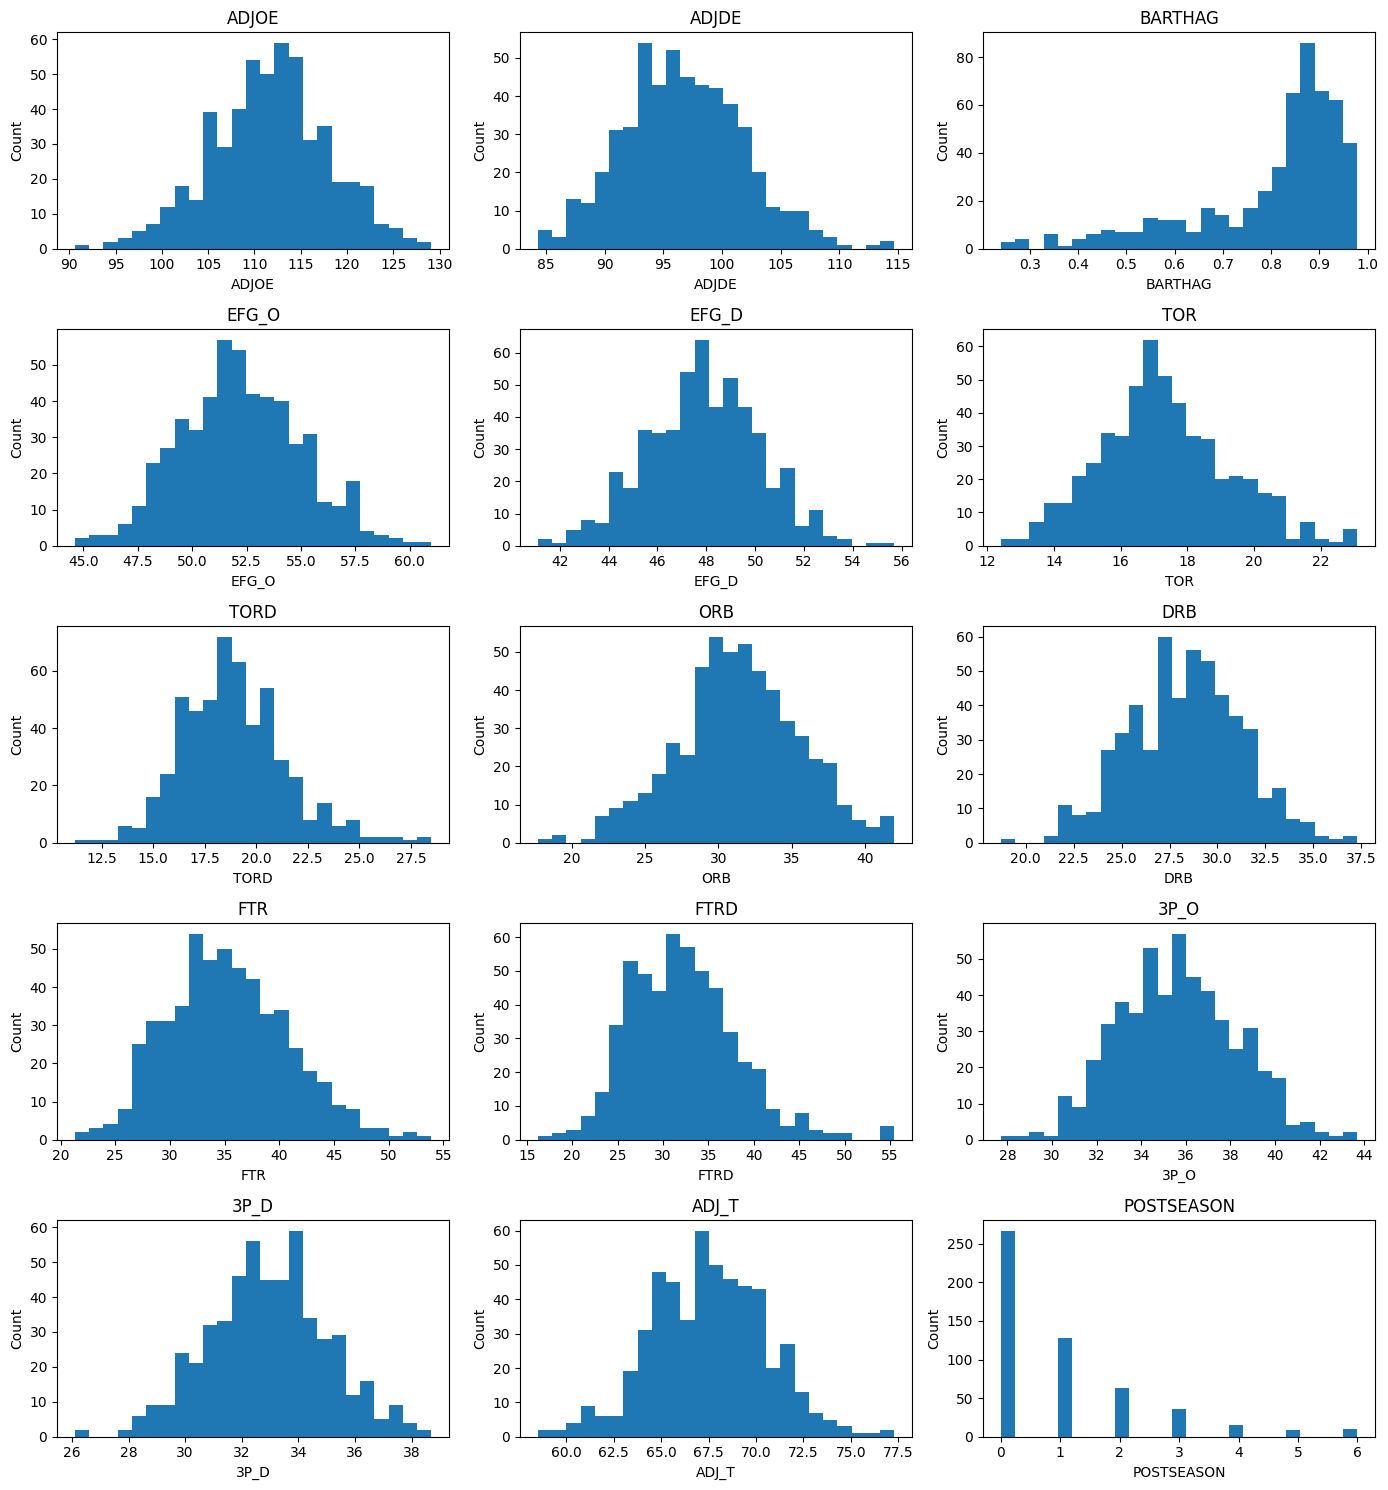

In [9]:
import matplotlib.pyplot as plt
import math

# Histogram representation
attribute_cols = train_data.columns
num_cols = len(attribute_cols)
cols = 3
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(14,rows*3))

for i, col in enumerate(attribute_cols, 1):
  plt.subplot(rows,cols,i)
  plt.hist(train_data[col].dropna(), bins=25)
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Boxplot representation

In [8]:
# Check for skew
display(train_data.skew())

,0
ADJOE,-0.090388
ADJDE,0.275825
BARTHAG,-1.429365
EFG_O,0.139123
EFG_D,-0.002457
TOR,0.307711
TORD,0.530141
ORB,-0.091489
DRB,0.011153
FTR,0.324201


**Part B Summary:**

Life Ladder
 - Mean = 5.47, STD = 1.11
 - Roughly bell shapes and symmetric, no skew

Log GDP per Capita
 - Mean = 9.36, STD = 1.16
 - Distribution is wide and more uniform

Social Support
 - Mean = 0.81, STD = 0.12
 - Strong left skew (-1.14)
 - 0 to 1 range
  
Healthy Life Expectancy
 - Mean = 63.33, STD = 7.48
 - Large range (32.3-77.1)
 - Moderate left skew (-0.72)

Freedom to Make Life Choices
 - Mean = 0.74, STD = 0.14
 - 0 to 1 range

Generosity
 - Mean = 0.00034, STD = 0.16
 - Right skew (0.83)
 - 0 to 1 range

Perceptions of Corruption
 - Mean = 0.75, STD = 0.19
 - Strong left skew (-1.54)
 - 0 to 1 range

Positive Affect
 - Mean = 0.71, STD = 0.11
 - 0 to 1 range
  
Negative Affect
 - Mean = 0.27, STD = 0.08
 - Moderate right skew (0.70)
 - 0 to 1 range
    
  
In order to treat missing values, can replace missing entries with median value for each attribute, since all are continuous and only missing a small percentage of entries.

Given the skewness and differing ranges for certain attributes, will need to perform scaling and possibly other transformations in order to see best results.


# **PART C:**

Analyze the relationships between the data attributes, and between the data attributes and label.


In [10]:
# Create correlation matrix

corr_matrix = train_data.corr()

display(corr_matrix)

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,3P_O,3P_D,ADJ_T,POSTSEASON
ADJOE,1.000000,-0.230325,0.763027,0.561902,0.002885,-0.492320,-0.247010,0.227921,-0.074131,-0.102594,-0.175656,0.433831,0.089026,0.094020,0.511961
ADJDE,-0.230325,1.000000,-0.740222,0.157210,0.699775,-0.068448,-0.308816,-0.285316,0.124816,0.001592,-0.000737,0.168476,0.400353,0.170904,-0.383555
BARTHAG,0.763027,-0.740222,1.000000,0.246556,-0.373692,-0.283814,0.008531,0.278002,-0.133281,-0.087284,-0.110275,0.153373,-0.155264,-0.031034,0.457032
EFG_O,0.561902,0.157210,0.246556,1.000000,0.169837,-0.226369,-0.292605,-0.318857,-0.259511,-0.227339,-0.300373,0.732610,0.103193,0.136649,0.213727
EFG_D,0.002885,0.699775,-0.373692,0.169837,1.000000,-0.181980,-0.037381,-0.300421,0.025496,-0.145982,-0.067363,0.147514,0.607723,0.222392,-0.223309
TOR,-0.492320,-0.068448,-0.283814,-0.226369,-0.181980,1.000000,0.229710,0.252003,0.167575,0.301751,0.207665,-0.178570,-0.117426,0.009184,-0.201532
TORD,-0.247010,-0.308816,0.008531,-0.292605,-0.037381,0.229710,1.000000,0.189353,0.397024,0.100652,0.481507,-0.224964,-0.082604,0.034888,-0.003373
ORB,0.227921,-0.285316,0.278002,-0.318857,-0.300421,0.252003,0.189353,1.000000,0.182233,0.289922,0.280374,-0.236204,-0.103004,-0.001935,0.189215
DRB,-0.074131,0.124816,-0.133281,-0.259511,0.025496,0.167575,0.397024,0.182233,1.000000,0.284170,0.342499,-0.109155,0.045632,0.107226,-0.017253
FTR,-0.102594,0.001592,-0.087284,-0.227339,-0.145982,0.301751,0.100652,0.289922,0.284170,1.000000,0.380690,-0.133450,0.047847,0.039025,-0.063143


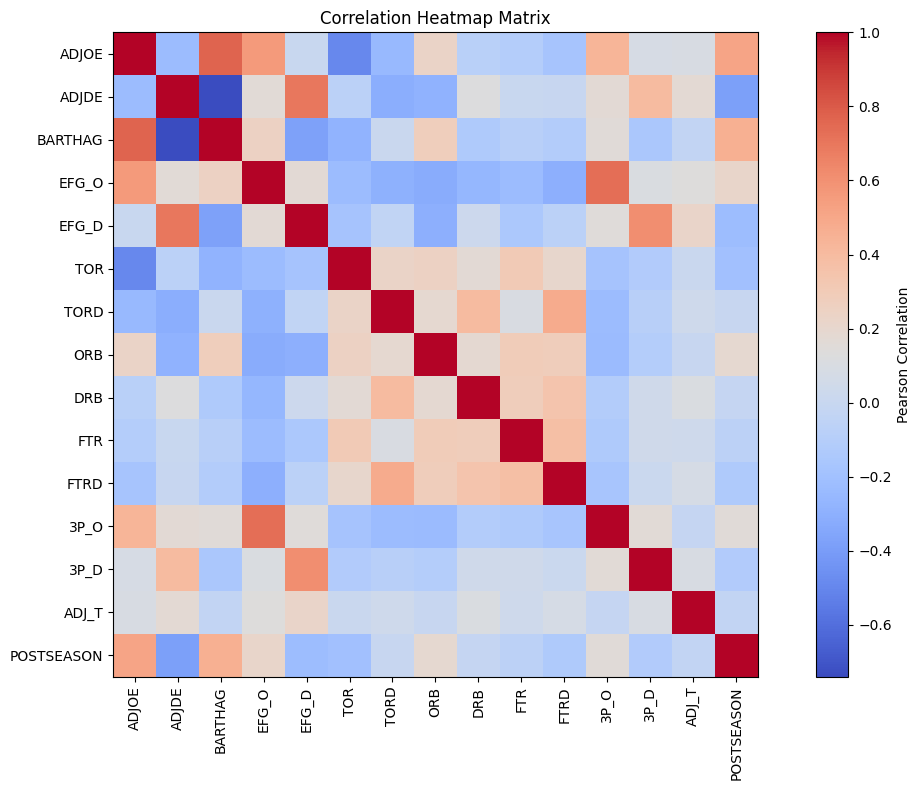

In [11]:
# Heatmap matrix

plt.figure(figsize=(12,8))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar(label="Pearson Correlation")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap Matrix")
plt.tight_layout()
plt.show()

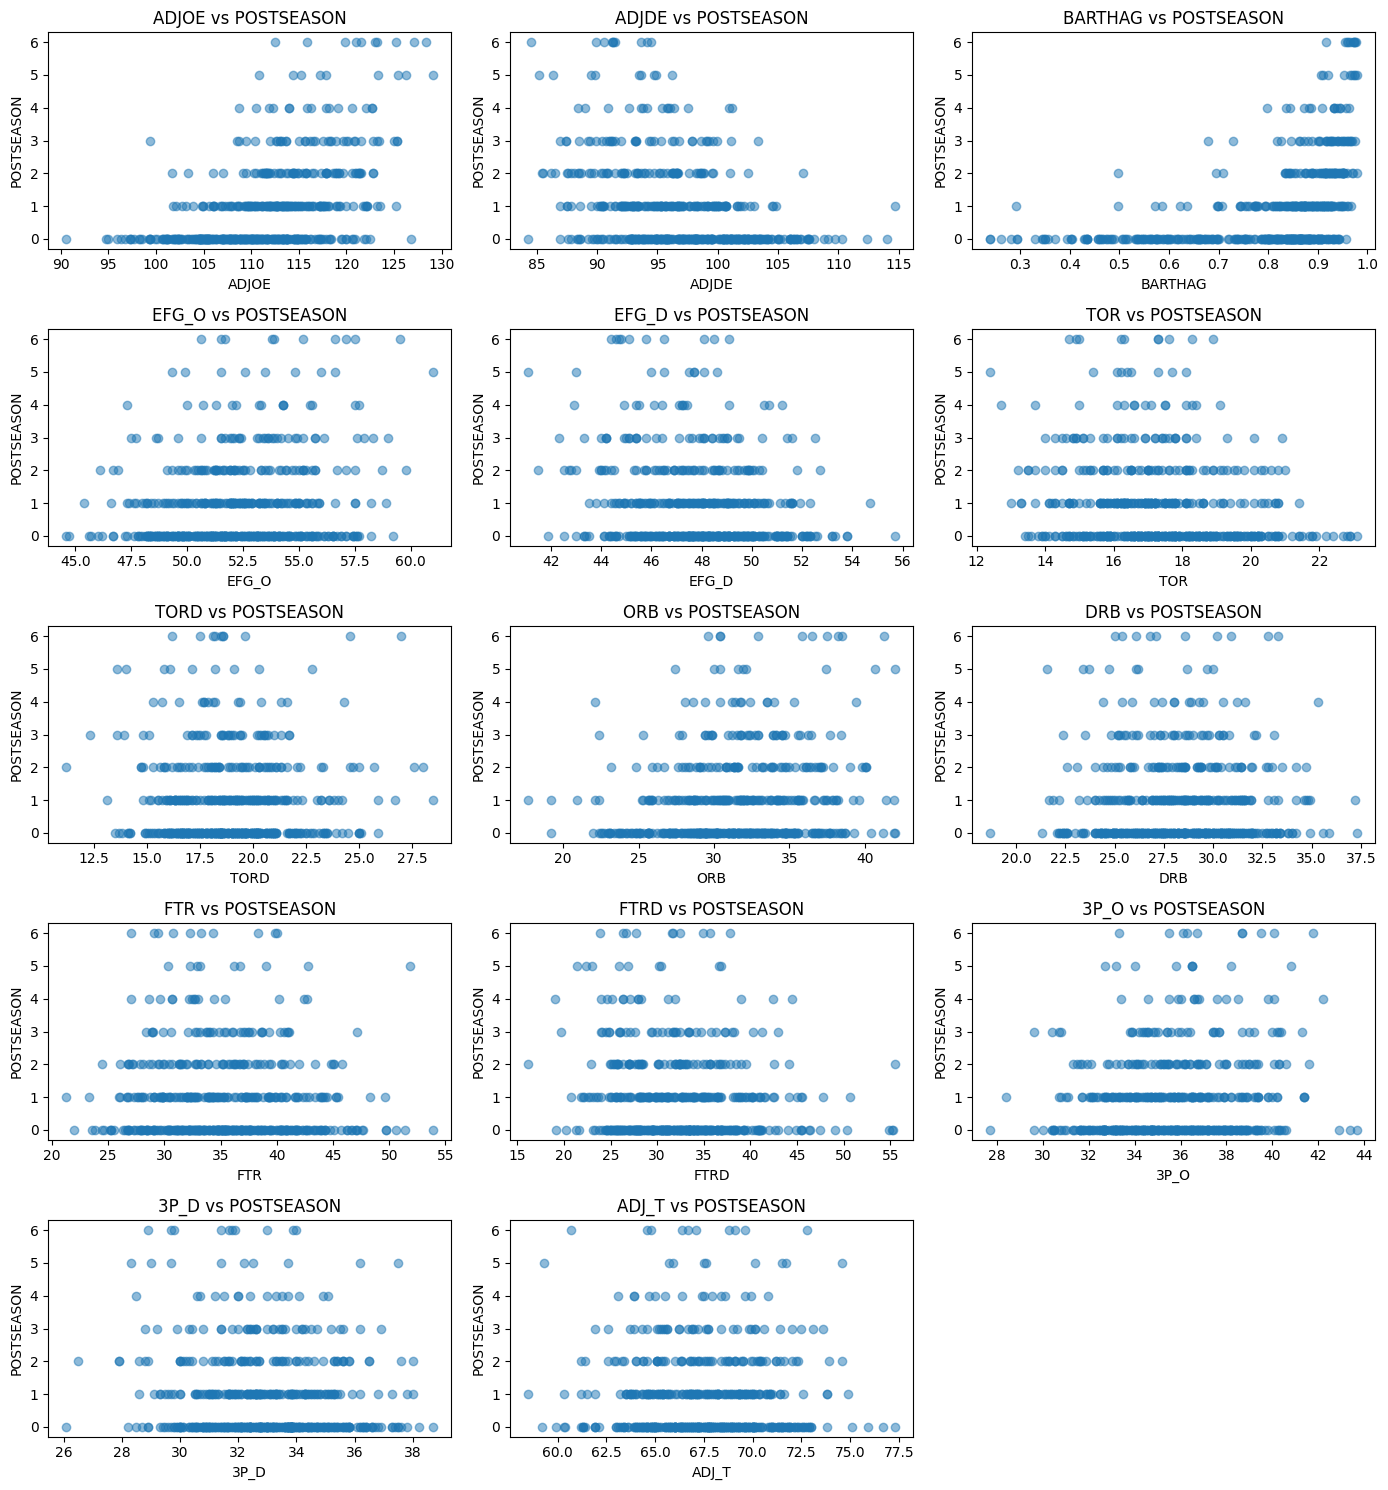

In [14]:
# Scatter Plots

attributes = train_data.columns.drop("POSTSEASON")
num_cols = len(attributes)

cols = 3
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(14,rows*3))

for i, col in enumerate(attributes, 1):
  plt.subplot(rows,cols,i)
  plt.scatter(train_data[col], train_data["POSTSEASON"], alpha=0.5)
  plt.title(f"{col} vs POSTSEASON")
  plt.xlabel(col)
  plt.ylabel("POSTSEASON")

plt.tight_layout()
plt.show()

**Part C Summary:**

Using Pearson Correlation Coefficients and scatter plots, I was able to analyze relationships between attributes and the target variable, Life Ladder.

Strong positive correlations were found between Life Ladder and Log GDP per capita, Social Support, Health Life Expectancy, Freedom to Make Life Choices, and Positive Affect. Negative correlations were seen with Perceptions of corrpution and Negative affect.

These results suggest that a combination economic, social, and emotional factors are associated with happiness.

# **PART D:**

Train a Linear Regression model using the training data with four-fold cross-validation and with appropriate evaluation metric.

In [16]:
# Import from sklearn and set up variables

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

X = train_data.drop(columns=["POSTSEASON"])
y = train_data["POSTSEASON"].values

In [17]:
# Closed Form (Normal Equation)

cv = KFold(n_splits=4, shuffle=True, random_state=42)

normal_eq_rmse = []

for fold, (train_id, val_id) in enumerate(cv.split(X), start=1):
  X_train, X_val = X.iloc[train_id], X.iloc[val_id]
  y_train, y_val = y[train_id], y[val_id]

  X_train_b = np.c_[np.ones((X_train.shape[0],1)), X_train]
  X_val_b = np.c_[np.ones((X_val.shape[0],1)), X_val]

  theta = np.linalg.inv(X_train_b.T @ X_train_b) @ (X_train_b.T @ y_train)

  y_hat = X_val_b @ theta
  fold_rmse = rmse(y_val, y_hat)
  normal_eq_rmse.append(fold_rmse)

  print(f"Normal EQ Fold {fold} RMSE: {fold_rmse:.4f}")

print(f"Normal EQ Mean 4-fold RMSE: {np.mean(normal_eq_rmse):.4f} +/- {np.std(normal_eq_rmse):.4f}")

Normal EQ Fold 1 RMSE: 1.1134
Normal EQ Fold 2 RMSE: 1.0199
Normal EQ Fold 3 RMSE: 1.0781
Normal EQ Fold 4 RMSE: 1.0072
Normal EQ Mean 4-fold RMSE: 1.0546 +/- 0.0432


In [18]:
# SGD

sgd_rmse = []

for fold, (train_id, val_id) in enumerate(cv.split(X), start=1):
  X_train, X_val = X.iloc[train_id], X.iloc[val_id]
  y_train, y_val = y[train_id], y[val_id]

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_val_scaled = scaler.transform(X_val)

  sgd = SGDRegressor(max_iter=5000, tol=1e-4, penalty=None, random_state=42)

  sgd.fit(X_train_scaled, y_train)
  y_hat = sgd.predict(X_val_scaled)

  fold_rmse = rmse(y_val, y_hat)
  sgd_rmse.append(fold_rmse)

  print(f"SGD Fold {fold} RMSE: {fold_rmse:.4f}")

print(f"SGD Mean RMSE: {np.mean(sgd_rmse):.4f} +/- {np.std(sgd_rmse):.4f}")

SGD Fold 1 RMSE: 1.1187
SGD Fold 2 RMSE: 1.0175
SGD Fold 3 RMSE: 1.0796
SGD Fold 4 RMSE: 1.0146
SGD Mean RMSE: 1.0576 +/- 0.0438


In [19]:
# Regularization

alphas = [0.0001, 0.001, 0.01]
etas = [0.001, 0.01]

results = []

for penalty_type in ["l2", "l1", "elasticnet"]:
  for alpha in alphas:
    for eta in etas:

      fold_rmse = []

      for train_id, val_id in cv.split(X):
        X_train, X_val = X.iloc[train_id], X.iloc[val_id]
        y_train, y_val = y[train_id], y[val_id]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        model = SGDRegressor(penalty=penalty_type, alpha = alpha, l1_ratio=0.5,
                             learning_rate="constant", eta0=eta, max_iter=5000,
                             tol=1e-4, random_state=42)

        model.fit(X_train_scaled, y_train)
        predictions = model.predict(X_val_scaled)

        fold_rmse.append(rmse(y_val, predictions))



      print(f"Penalty={penalty_type}, alpha={alpha}, eta={eta}, RMSE={np.mean(fold_rmse):.4f}")

      results.append([penalty_type, alpha, eta, np.mean(fold_rmse)])

results_df = pd.DataFrame(results, columns=["Penalty", "Alpha", "Eta", "Mean_RMSE"])
results_df.sort_values("Mean_RMSE").head(10)

best = results_df.iloc[0]
best

Penalty=l2, alpha=0.0001, eta=0.001, RMSE=1.0599
Penalty=l2, alpha=0.0001, eta=0.01, RMSE=1.1056
Penalty=l2, alpha=0.001, eta=0.001, RMSE=1.0580
Penalty=l2, alpha=0.001, eta=0.01, RMSE=1.1060
Penalty=l2, alpha=0.01, eta=0.001, RMSE=1.0660
Penalty=l2, alpha=0.01, eta=0.01, RMSE=1.1121
Penalty=l1, alpha=0.0001, eta=0.001, RMSE=1.0590
Penalty=l1, alpha=0.0001, eta=0.01, RMSE=1.1024
Penalty=l1, alpha=0.001, eta=0.001, RMSE=1.0592
Penalty=l1, alpha=0.001, eta=0.01, RMSE=1.0861
Penalty=l1, alpha=0.01, eta=0.001, RMSE=1.0555
Penalty=l1, alpha=0.01, eta=0.01, RMSE=1.0741
Penalty=elasticnet, alpha=0.0001, eta=0.001, RMSE=1.0591
Penalty=elasticnet, alpha=0.0001, eta=0.01, RMSE=1.1039
Penalty=elasticnet, alpha=0.001, eta=0.001, RMSE=1.0607
Penalty=elasticnet, alpha=0.001, eta=0.01, RMSE=1.0918
Penalty=elasticnet, alpha=0.01, eta=0.001, RMSE=1.0624
Penalty=elasticnet, alpha=0.01, eta=0.01, RMSE=1.0807


,0
Penalty,l2
Alpha,0.0001
Eta,0.001
Mean_RMSE,1.059851


In [20]:
# Train model with best results

best_penalty = best["Penalty"]
best_alpha = best["Alpha"]
best_eta = best["Eta"]

scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X)

best_model = SGDRegressor(penalty=best_penalty, alpha=best_alpha, l1_ratio=0.5,
                          learning_rate="constant", eta0=best_eta, max_iter=5000,
                          tol=1e-4, random_state=42)

best_model.fit(X_scaled_all, y)

SGDRegressor(alpha=np.float64(0.0001), eta0=np.float64(0.001), l1_ratio=0.5,
             learning_rate='constant', max_iter=5000, random_state=42,
             tol=0.0001)

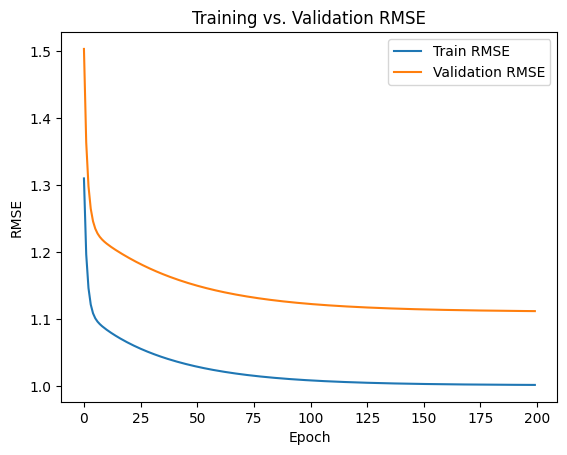

In [22]:
# Plot results

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

epochs = 200
train_rmse = []
val_rmse = []

sgd_epoch = SGDRegressor(penalty=best_penalty, alpha=best_alpha, l1_ratio=0.5,
                          learning_rate="constant", eta0=best_eta, max_iter=1,
                          warm_start=True, tol=None, random_state=42)

for epoch in range(epochs):
  sgd_epoch.fit(X_train_scaled, y_train)

  train_pred = sgd_epoch.predict(X_train_scaled)
  val_pred = sgd_epoch.predict(X_val_scaled)

  train_rmse.append(rmse(y_train, train_pred))
  val_rmse.append(rmse(y_val, val_pred))

plt.plot(train_rmse, label="Train RMSE")
plt.plot(val_rmse, label="Validation RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.title("Training vs. Validation RMSE")
plt.show()

**Part D Summary:**

In part D I performed linear regression using both the closed form Normal Equation and SGD with 4-fold cross validation. Then regularization using Ridge, Lasso, and Elastic Net were evaluated with various combinations of alpha values and learning rates.

The best linear model was Ridge with an alpha = 0.0001 and learning rate = 0.001, with an RMSE of roughly 0.549.

# **PART E:**

Train a Polynomial Regression Regression model.

In [25]:
# Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

degrees = [2,3]

poly_results = []

for degree in degrees:
  for penalty_type in ["l2", "l1", "elasticnet"]:
    for alpha in alphas:
      for eta in etas:

        fold_rmse = []
        for train_id, val_id in cv.split(X):
          X_train, X_val = X.iloc[train_id], X.iloc[val_id]
          y_train, y_val = y[train_id], y[val_id]

          scaler = StandardScaler()
          X_train_scaled = scaler.fit_transform(X_train)
          X_val_scaled = scaler.transform(X_val)

          poly = PolynomialFeatures(degree=degree, include_bias=False)
          X_train_poly = poly.fit_transform(X_train_scaled)
          X_val_poly = poly.transform(X_val_scaled)

          model = SGDRegressor(penalty=penalty_type, alpha=alpha, l1_ratio=0.5,
                              learning_rate="constant", eta0=eta, max_iter=5000,
                              tol=1e-4, random_state=42)

          model.fit(X_train_poly, y_train)
          predictions = model.predict(X_val_poly)

          fold_rmse.append(rmse(y_val, predictions))

        mean_rmse = np.mean(fold_rmse)

        print(f"Degree={degree}, Penalty={penalty_type}, alpha={alpha}, eta={eta}, RMSE={mean_rmse:.4f}")

        poly_results.append([2, penalty_type, alpha, eta, mean_rmse])

poly_df = pd.DataFrame(poly_results, columns=["Degree", "Penalty", "Alpha", "Eta", "Mean_RMSE"])
poly_df.sort_values("Mean_RMSE").head(10)

Degree=2, Penalty=l2, alpha=0.0001, eta=0.001, RMSE=1.1815
Degree=2, Penalty=l2, alpha=0.0001, eta=0.01, RMSE=795585977488.6078
Degree=2, Penalty=l2, alpha=0.001, eta=0.001, RMSE=1.1809
Degree=2, Penalty=l2, alpha=0.001, eta=0.01, RMSE=747685367032.2170
Degree=2, Penalty=l2, alpha=0.01, eta=0.001, RMSE=1.1759
Degree=2, Penalty=l2, alpha=0.01, eta=0.01, RMSE=845167427249.2863
Degree=2, Penalty=l1, alpha=0.0001, eta=0.001, RMSE=1.1810
Degree=2, Penalty=l1, alpha=0.0001, eta=0.01, RMSE=802423302857.4390
Degree=2, Penalty=l1, alpha=0.001, eta=0.001, RMSE=1.1830
Degree=2, Penalty=l1, alpha=0.001, eta=0.01, RMSE=809875620969.4213
Degree=2, Penalty=l1, alpha=0.01, eta=0.001, RMSE=1.1248
Degree=2, Penalty=l1, alpha=0.01, eta=0.01, RMSE=1229935008306.6680
Degree=2, Penalty=elasticnet, alpha=0.0001, eta=0.001, RMSE=1.1812
Degree=2, Penalty=elasticnet, alpha=0.0001, eta=0.01, RMSE=797269152390.9518
Degree=2, Penalty=elasticnet, alpha=0.001, eta=0.001, RMSE=1.1843
Degree=2, Penalty=elasticnet, alp

,Degree,Penalty,Alpha,Eta,Mean_RMSE
10,2,l1,0.0100,0.001,1.124827e+00
16,2,elasticnet,0.0100,0.001,1.154332e+00
4,2,l2,0.0100,0.001,1.175908e+00
2,2,l2,0.0010,0.001,1.180915e+00
6,2,l1,0.0001,0.001,1.181001e+00
12,2,elasticnet,0.0001,0.001,1.181225e+00
0,2,l2,0.0001,0.001,1.181452e+00
8,2,l1,0.0010,0.001,1.182997e+00
14,2,elasticnet,0.0010,0.001,1.184330e+00
3,2,l2,0.0010,0.010,7.476854e+11


**Part E Summary:**

Part E repeats the actions of part D, but uses polynomial regression implemented using SGD with degrees 2 and 3. Degree 2 improved performance with a cross validation RMSE of roughly 0.5118, suggesting some nonlinear relationships. On the other hand, degree 3 gave results with very large RMSE values, indicating overfitting on the training data. I removed testing of degree 3 for simplicity.

These results show the bias/variance tradeoff, increasing the complexity increased the variance.

# **PART F:**

Make predictions of the labels on the test data, using the trained model with chosen (best) hyperparameters.

In [31]:
# Test data predictions

test_data = test_data

X_test = test_data.drop(columns=["POSTSEASON"])
y_test = test_data["POSTSEASON"].values

X_test = X_test[X.columns]

X_train_b = np.c_[np.ones((X.shape[0], 1)), X]

theta_best = np.linalg.inv(X_train_b.T @ X_train_b) @ (X_train_b.T @ y)

X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

test_predictions = X_test_b @ theta_best
test_rmse = rmse(y_test, test_predictions)

print(f"Test RMSE: {test_rmse:.4f}")

Test RMSE: 0.9151


[ 2.52753553e-01 -2.82948396e-01 -1.02440144e+01  6.17573956e-03
  4.38366553e-02 -8.81914012e-03 -2.01563216e-02 -5.13595077e-03
  4.07974923e-02 -7.25676823e-03 -1.03071422e-02 -1.35335541e-02
 -2.08663767e-02 -5.48176772e-03]
7.586040708281189


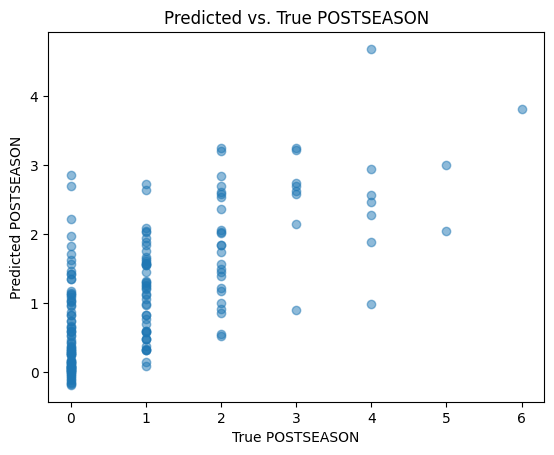

In [33]:
# Other results

print(theta_best[1:])
print(theta_best[0])

plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel("True POSTSEASON")
plt.ylabel("Predicted POSTSEASON")
plt.title("Predicted vs. True POSTSEASON")
plt.show()

**Part F Summary:**

The best performing model was a degree 2 polynomial regression with Elastic Net regularization (alpha = 0.01, eta = 0.001). The model was then retrained on the full training dataset and evaluated on the test data.

The resulting test RMSE was 0.5116 which is very close to the cross-validation RMSE 0.5118, which shows strong generalization and no signs of overfitting.

# **Extra Plots:**


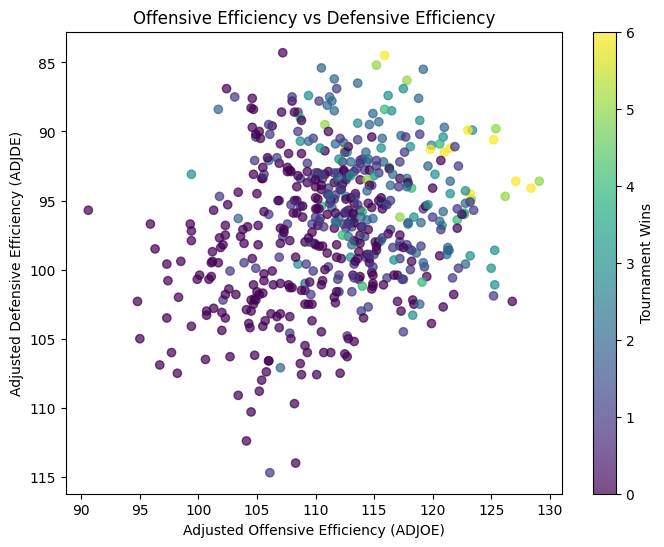

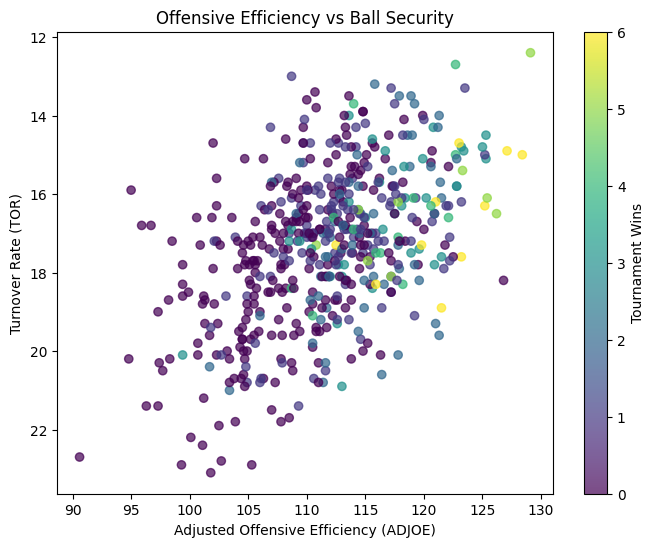

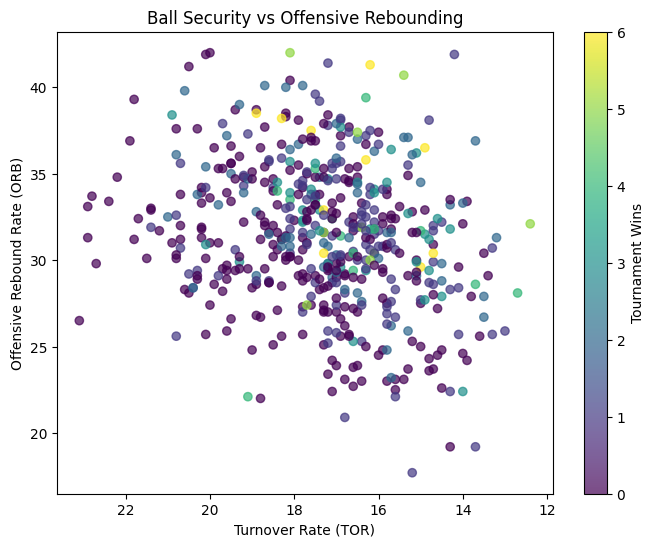

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(train_data["ADJOE"], train_data["ADJDE"],
            c=train_data["POSTSEASON"],
            cmap="viridis", alpha=0.7)

plt.xlabel("Adjusted Offensive Efficiency (ADJOE)")
plt.ylabel("Adjusted Defensive Efficiency (ADJDE)")
plt.title("Offensive Efficiency vs Defensive Efficiency")
plt.colorbar(label="Tournament Wins")

plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(train_data["ADJOE"], train_data["TOR"],
            c=train_data["POSTSEASON"],
            cmap="viridis", alpha=0.7)

plt.xlabel("Adjusted Offensive Efficiency (ADJOE)")
plt.ylabel("Turnover Rate (TOR)")
plt.title("Offensive Efficiency vs Ball Security")
plt.colorbar(label="Tournament Wins")

plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(train_data["TOR"], train_data["ORB"],
            c=train_data["POSTSEASON"],
            cmap="viridis", alpha=0.7)

plt.xlabel("Turnover Rate (TOR)")
plt.ylabel("Offensive Rebound Rate (ORB)")
plt.title("Ball Security vs Offensive Rebounding")
plt.colorbar(label="Tournament Wins")

plt.gca().invert_xaxis()
plt.show()